In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv("D:\Data science\DataSets\crime_data.csv")

In [3]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


#### Identify duplicates records in the data

In [7]:
duplicates = df.duplicated()
duplicates

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [32]:
duplicates.sum()

0

No Duplicates in this Dataset

#### Outlier Treatment

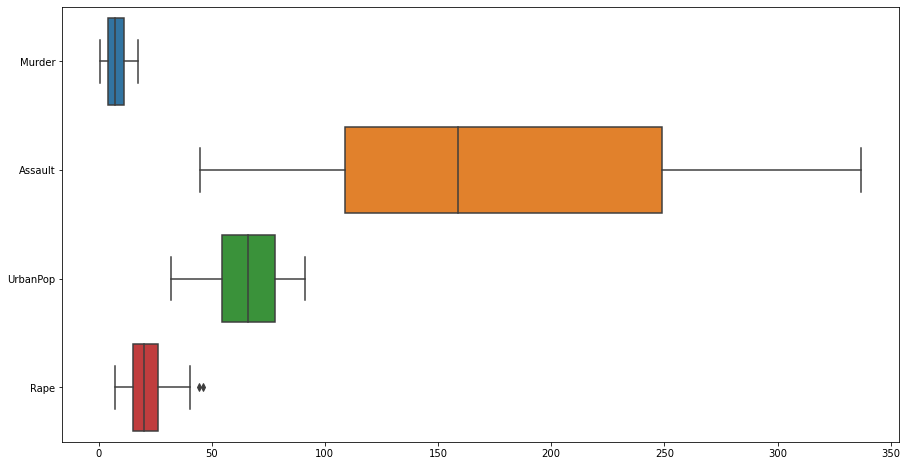

In [9]:
plt.figure(figsize = (15,8))
sns.boxplot(data=df, orient='h')
plt.show()

In [10]:
from feature_engine.outliers import Winsorizer

In [11]:
winsor = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['Murder','Assault','UrbanPop','Rape'])
df_t = winsor.fit_transform(df[['Murder','Assault','UrbanPop','Rape']])

<AxesSubplot:>

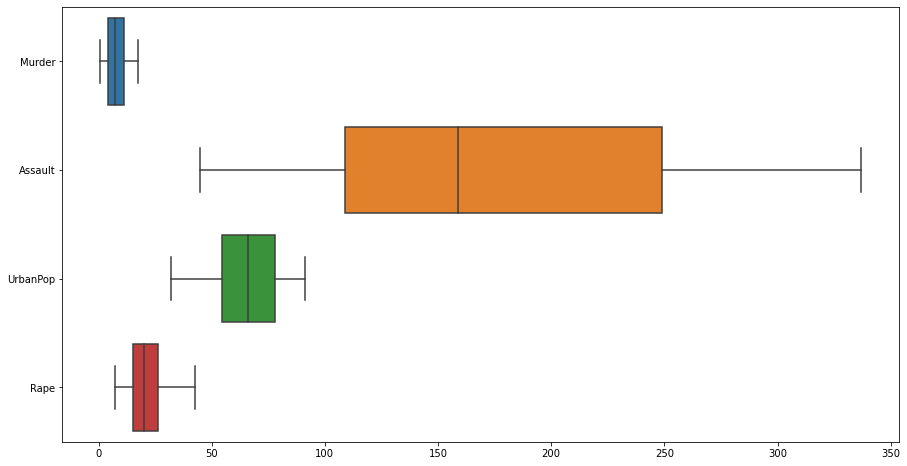

In [12]:
plt.figure(figsize = (15,8))
sns.boxplot(data=df_t, orient='h')

#### Missing Values

In [13]:
df.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [14]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


#### Normalized data

In [15]:
def norm_fun(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [16]:
df_norm = norm_fun(df)

In [17]:
df_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


### for creating dendrogram 

In [18]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [19]:
z = linkage(df_norm, method = 'complete', metric = 'euclidean')

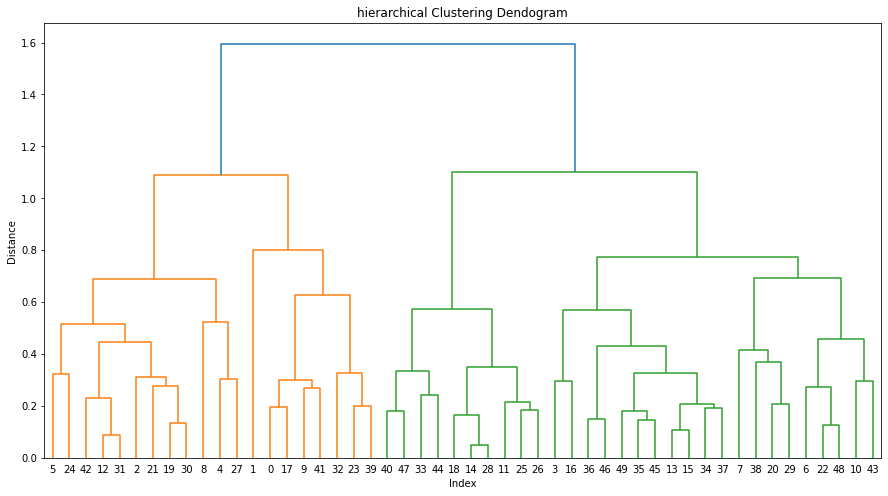

In [20]:
plt.figure(figsize = (15,8));plt.title('hierarchical Clustering Dendogram');plt.xlabel('Index');plt.ylabel('Distance')
dendrogram(z, leaf_rotation = 0, leaf_font_size = 10)
plt.show()

Now applying AgglomerativeClustering choosing 5 as clusters from the above dendrogram

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
h_complete = AgglomerativeClustering(n_clusters = 5, linkage = 'complete', affinity = 'euclidean').fit(df_norm)

In [23]:
h_complete.labels_

array([3, 4, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0], dtype=int64)

In [24]:
cluster_lables = pd.Series(h_complete.labels_)

In [25]:
cluster_lables

0     3
1     4
2     1
3     0
4     1
5     1
6     0
7     0
8     1
9     3
10    0
11    2
12    1
13    0
14    2
15    0
16    0
17    3
18    2
19    1
20    0
21    1
22    0
23    3
24    1
25    2
26    2
27    1
28    2
29    0
30    1
31    1
32    3
33    2
34    0
35    0
36    0
37    0
38    0
39    3
40    2
41    3
42    1
43    0
44    2
45    0
46    0
47    2
48    0
49    0
dtype: int64

In [26]:
df['clust'] = cluster_lables

In [27]:
df

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,4
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,3


In [28]:
crime_data = df.iloc[:, [4,0,1,2,3,]]

In [29]:
crime_data


,clust,Murder,Assault,UrbanPop,Rape
0,3,13.2,236,58,21.2
1,4,10.0,263,48,44.5
2,1,8.1,294,80,31.0
3,0,8.8,190,50,19.5
4,1,9.0,276,91,40.6
5,1,7.9,204,78,38.7
6,0,3.3,110,77,11.1
7,0,5.9,238,72,15.8
8,1,15.4,335,80,31.9
9,3,17.4,211,60,25.8


In [30]:
crime_data.iloc[:, 2:].groupby(crime_data.clust).mean()

,Assault,UrbanPop,Rape
clust,,,
0,132.300000,70.800000,18.100000
1,256.916667,78.333333,32.250000
2,78.700000,49.300000,11.630000
3,251.285714,54.285714,21.685714
4,263.000000,48.000000,44.500000


In [31]:
crime_data.iloc[:, 2:].groupby(crime_data.clust).var()

,Assault,UrbanPop,Rape
clust,,,
0,2101.063158,114.800000,25.655789
1,2066.810606,49.333333,45.260909
2,700.900000,84.011111,10.902333
3,2340.238095,72.904762,16.251429
4,NaN,NaN,NaN
